In [1]:
from estimark.agents import IndShkLifeCycleConsumerType
from estimark.parameters import init_consumer_objects, timevary_DiscFac
import numpy as np
from HARK.utilities import plot_funcs
import matplotlib.pyplot as plt
import pandas as pd
from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle

In [2]:
csv_file_path = "../content/tables/IndShock_estimate_results.csv"

res = pd.read_csv(csv_file_path, header=None)
DiscFacAdj, CRRA = res.iloc[:2, 1].astype(float).tolist()

In [3]:
indshk_agent = IndShkLifeCycleConsumerType(**init_consumer_objects)
indshk_agent.CRRA = CRRA
indshk_agent.DiscFac = [b * DiscFacAdj for b in timevary_DiscFac]
CRRA, DiscFacAdj

(3.5876208556877303, 0.9294006675489787)

In [4]:
init_consumer_objects

{'cycles': 1,
 'CRRA': 5.0,
 'Rfree': 1.03,
 'DiscFac': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'LivPrb': [0.998341,
  0.998262,
  0.99826,
  0.998172,
  0.99803,
  0.99796,
  0.997886,
  0.997792,
  0.997587,
  0.99747,
  0.997398,
  0.997621,
  0.997822,
  0.997755,
  0.997607,
  0.997421,
  0.99722,
  0.996942,
  0.996701,
  0.996562,
  0.996243,
  0.996023,
  0.995789,
  0.995449,
  0.995122,
  0.994844,
  0.994377,
  0.993913,
  0.993402,
  0.992824,
  0.992191,
  0.991511,
  0.990844,
  0.990081,
  0.989317,
  0.988495,
  0.987654,
  0.986892,
  0.986244,
  0.985647,
  0.984987,
  0.984198,
  0.98

In [5]:
indshk_agent.solve()

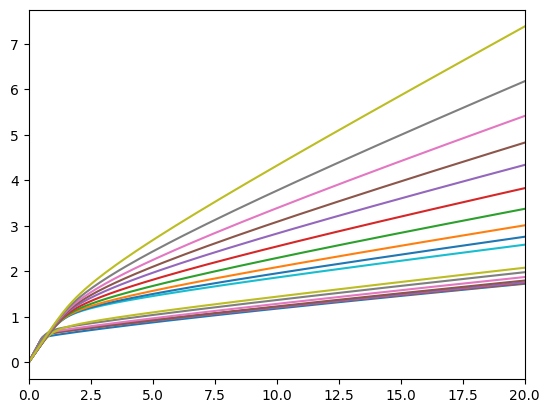

<Figure size 640x480 with 0 Axes>

In [6]:
plot_funcs([sol.cFunc for sol in indshk_agent.solution[:-1:5]], 0, 20)
plt.savefig("../content/figures/IndShock_cFunc.png")

In [7]:
# Set up the variables we want to keep track of.
indshk_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

indshk_agent.T_sim = indshk_agent.T_cycle + 1
# Run the simulations
indshk_agent.initialize_sim()
history = indshk_agent.simulate()

In [8]:
raw_data = {
    "Age": indshk_agent.history["t_age"].flatten() + 25 - 1,
    "pIncome": indshk_agent.history["pLvl"].flatten(),
    "nrmM": indshk_agent.history["mNrm"].flatten(),
    "nrmC": indshk_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC
Data["M"] = Data.nrmM

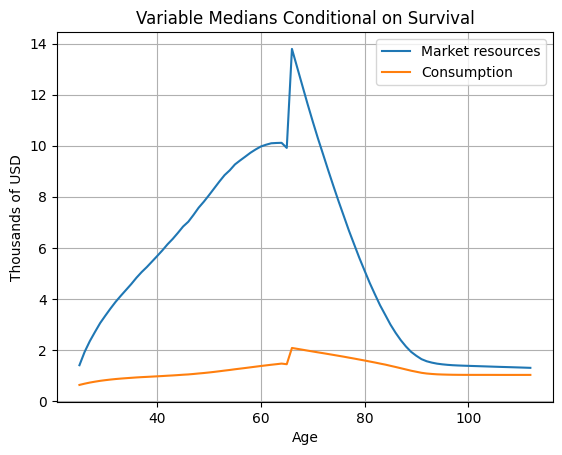

In [9]:
# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

plt.figure()
# plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()

In [10]:
indshk_agent = IndShkLifeCycleConsumerType(**init_consumer_objects)
indshk_agent.CRRA = CRRA
indshk_agent.DiscFac = [b * DiscFacAdj for b in timevary_DiscFac]

lifecycle_agent = IndShkLifeCycleConsumerType(
    **{**init_lifecycle, "PermGroFacAgg": 1.0}
)


lifecycle_agent.DiscFac = [init_lifecycle["DiscFac"] for b in timevary_DiscFac]

In [11]:
param_list = set(lifecycle_agent.__dict__.keys()).union(
    set(indshk_agent.__dict__.keys())
)

for param in param_list:
    current_value = getattr(indshk_agent, param, None)
    original_value = getattr(lifecycle_agent, param, None)

    if current_value is None:
        print(f"{param} not in indshk_agent\n")
    elif original_value is None:
        print(f"{param} not in lifecycle_agent\n")
    else:
        print(f"{param}")
        print(f"current:  {current_value}")
        print(f"original: {original_value}")
        print("\n")

quiet
current:  False
original: False


MaxKinks
current:  400
original: 400


time_vary
current:  ['LivPrb', 'PermGroFac', 'IncShkDstn', 'PermShkDstn', 'TranShkDstn', 'DiscFac']
original: ['LivPrb', 'PermGroFac', 'IncShkDstn', 'PermShkDstn', 'TranShkDstn', 'DiscFac']


shock_history
current:  {}
original: {}


pseudo_terminal
current:  False
original: False


time_inv
current:  ['CRRA', 'BoroCnstArt', 'BoroCnstArt', 'vFuncBool', 'CubicBool', 'Rfree', 'aXtraGrid']
original: ['CRRA', 'BoroCnstArt', 'BoroCnstArt', 'vFuncBool', 'CubicBool', 'Rfree', 'aXtraGrid']


UnempPrb
current:  0.05
original: 0.05


NewbornTransShk
current:  False
original: False


newborn_init_history
current:  {}
original: {}


AgentCount
current:  10000
original: 10000


TranShkDstn
current:  <HARK.distribution.IndexDistribution object at 0x0000016BE12AABF0>
original: <HARK.distribution.IndexDistribution object at 0x0000016BE0F6BD60>


IncShkDstn
current:  <HARK.distribution.IndexDistribution object at 0x0000016BE

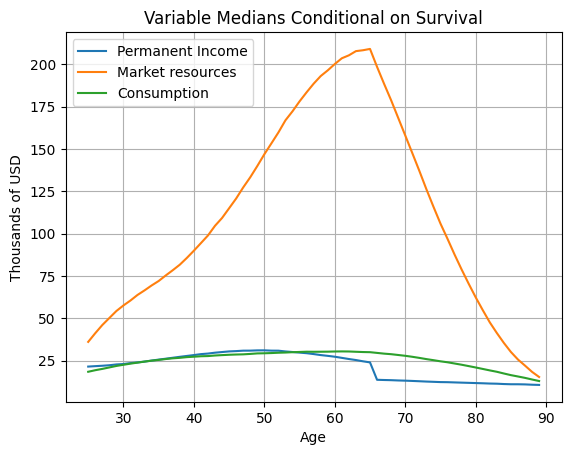

In [12]:
lifecycle_agent.solve()
# Set up the variables we want to keep track of.
lifecycle_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

lifecycle_agent.T_sim = 200
# Run the simulations
lifecycle_agent.initialize_sim()
history = lifecycle_agent.simulate()

raw_data = {
    "Age": lifecycle_agent.history["t_age"].flatten() + 25 - 1,
    "pIncome": lifecycle_agent.history["pLvl"].flatten(),
    "nrmM": lifecycle_agent.history["mNrm"].flatten(),
    "nrmC": lifecycle_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()